In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


df_train=pd.read_csv("NSL_KDD_Train.csv")
df_test=pd.read_csv("NSL_KDD_Test.csv")


In [55]:
#Naming each Feature
features = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

In [56]:
# Assigning feature name to train dataset
train_dataset = pd.read_csv("NSL_KDD_Train.csv", header=None, names = features)
train_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [57]:
# Assigning feature name to test dataset
test_dataset = pd.read_csv("NSL_KDD_Test.csv", header=None, names = features)
test_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [58]:
# Check for missing values
print(train_dataset.isnull())

print(test_dataset.isnull())

# No missing values found, so no further action needed

        duration  protocol_type  service   flag  src_bytes  dst_bytes   land  \
0          False          False    False  False      False      False  False   
1          False          False    False  False      False      False  False   
2          False          False    False  False      False      False  False   
3          False          False    False  False      False      False  False   
4          False          False    False  False      False      False  False   
...          ...            ...      ...    ...        ...        ...    ...   
125968     False          False    False  False      False      False  False   
125969     False          False    False  False      False      False  False   
125970     False          False    False  False      False      False  False   
125971     False          False    False  False      False      False  False   
125972     False          False    False  False      False      False  False   

        wrong_fragment  urgent    hot  

In [59]:
#label distribution of Training set and testing set
print('Label distribution in Training set:')
print(train_dataset['label'].value_counts())
print()
print('Label distribution in Test set:')
print(test_dataset['label'].value_counts())

Label distribution in Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution in Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpge

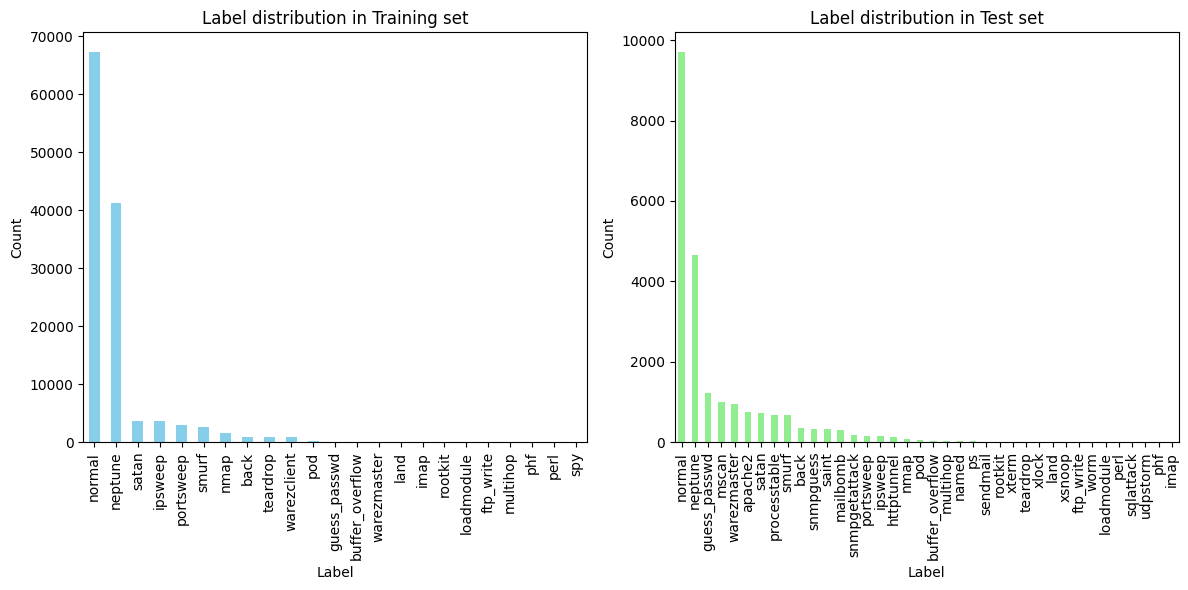

In [60]:
# Count the occurrences of each label in the training set
train_label_counts = train_dataset['label'].value_counts()

# Count the occurrences of each label in the testing set
test_label_counts = test_dataset['label'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the label distribution in the training set
train_label_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Label distribution in Training set')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

# Plot the label distribution in the testing set
test_label_counts.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Label distribution in Test set')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [61]:
#Identify categorical features
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in train_dataset.columns:
    if train_dataset[col_name].dtypes == 'object' :
        unique_cat = len(train_dataset[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(train_dataset['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


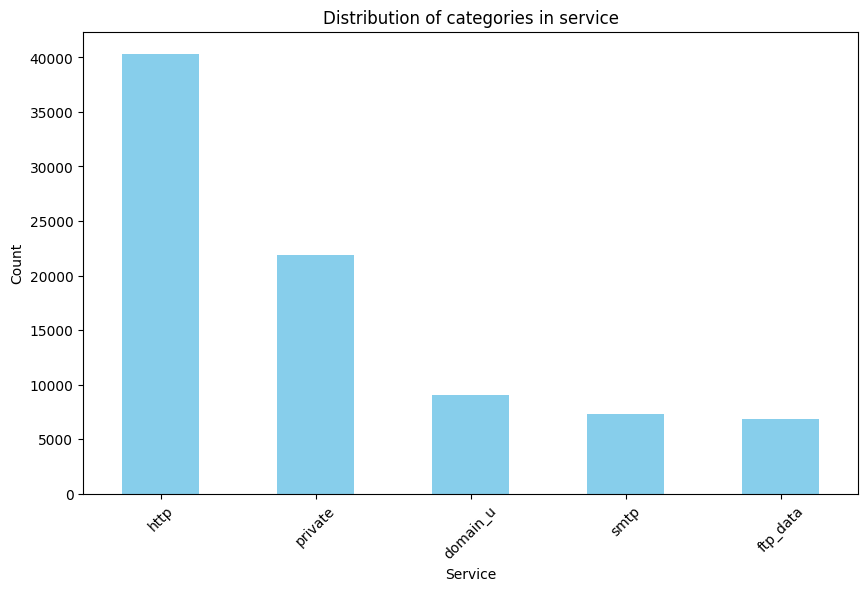

In [62]:
# Count the occurrences of each category
service_counts = train_dataset['service'].value_counts().sort_values(ascending=False).head()

# Plot the distribution
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of categories in service')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **LabelEncoder**

In [63]:
categorical_columns=['protocol_type', 'service', 'flag']
 #insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 #Get the categorical values into a 2D numpy array
train_dataset_categorical_values = train_dataset[categorical_columns]
test_dataset_categorical_values = test_dataset[categorical_columns]


In [64]:
train_dataset_categorical_values.head(101)


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
96,udp,other,SF
97,tcp,http,SF
98,udp,other,SF
99,tcp,private,S0


# **Dummy columns**

In [65]:
# protocol type
protocol_types=sorted(train_dataset.protocol_type.unique())
protocol_prefix = 'Protocol_type_'
protocol_names=[protocol_prefix + x for x in protocol_types]
# service
service_types=sorted(train_dataset.service.unique())
service_prefix = 'service_'
service_names=[service_prefix + x for x in service_types]
# flag
flag_types=sorted(train_dataset.flag.unique())
flag_prefix = 'flag_'
flag_names=[flag_prefix + x for x in flag_types]
# put together
dummy_columns=protocol_names + service_names + flag_names
print(dummy_columns)

#do same for test set
test_service_types=sorted(test_dataset.service.unique())
test_service_names=[service_prefix + x for x in test_service_types]
testdummy_columns=protocol_names + test_service_names + flag_names



['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

Transform categorical features into numbers using LabelEncoder()

In [66]:
#Transform categorical features into numbers using LabelEncoder()
train_dataset_categorical_values_enc=train_dataset_categorical_values.apply(LabelEncoder().fit_transform)
print(train_dataset_categorical_values_enc.head())
# test set
test_dataset_categorical_values_enc=test_dataset_categorical_values.apply(LabelEncoder().fit_transform)


   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


# **One-Hot-Encoding**
One-hot encoding expands upon dummy columns by creating a binary column for each unique category within a categorical feature.



In [67]:
# one-hot-encoding

# We're going to useing one-hot-encoding to change our categorical data into numbers that our machine can understand.
# setting up one-hot-encoding
enc = OneHotEncoder()

# applying it on training dataset.
train_dataset_categorical_values_encoded = enc.fit_transform(train_dataset_categorical_values_enc)

train_dataset_cat_data = pd.DataFrame(train_dataset_categorical_values_encoded.toarray(), columns=dummy_columns)# putting numbers into a table after coverting them

# applying it on test dataset.
test_dataset_categorical_values_encoded = enc.fit_transform(test_dataset_categorical_values_enc)
test_dataset_cat_data = pd.DataFrame(test_dataset_categorical_values_encoded.toarray(), columns=testdummy_columns)


# Add 6 missing categories from train set to test set

In [68]:
# grab the 'service' column values from the training dataset and make them into a list
trainservice = train_dataset['service'].tolist()
# do the same for the 'service'
testservice = test_dataset['service'].tolist()
# figure out which 'service' values are in the training dataset but not in the test dataset
# then make a list of these unique differences
difference = list(set(trainservice) - set(testservice))

# add the word 'service_' in front of each item in the difference list
prefix = 'service_'
difference = [prefix + x for x in difference]

# show me the resulting list
print(difference)

['service_urh_i', 'service_red_i', 'service_harvest', 'service_http_2784', 'service_http_8001', 'service_aol']


In [69]:
for col in difference:
    test_dataset_cat_data[col] = 0

test_dataset_cat_data.shape
#adds new columns to the test dataset categorical data based on the items in the 'difference list'. so eaach new column is filled with zeros for all rows.


(22544, 84)

# Join encoded categorical dataframe with the non-categorical dataframe

In [70]:
# For the training dataset:
# Join the encoded categorical dataframe (train_dataset_cat_data) with the non-categorical dataframe (train_dataset)
newset = train_dataset.join(train_dataset_cat_data)

# Drop the 'flag', 'protocol_type', and 'service' columns from the training dataset
newset.drop('flag', axis=1, inplace=True)
newset.drop('protocol_type', axis=1, inplace=True)
newset.drop('service', axis=1, inplace=True)

# For the test dataset:
newset_test = test_dataset.join(test_dataset_cat_data)
newset_test.drop('flag', axis=1, inplace=True)
newset_test.drop('protocol_type', axis=1, inplace=True)
newset_test.drop('service', axis=1, inplace=True)

print(newset.shape)
print(newset_test.shape)


(125973, 123)
(22544, 123)


# Split Dataset into 4 datasets for every attack category
Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
Replace labels column with new labels column
 Make new datasets

In [71]:
# take label column
labelset=newset['label']
labelset_test=newset_test['label']
# change the label column

newlabelset=labelset.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabelset_test=labelset_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newset['label'] = newlabelset
newset_test['label'] = newlabelset_test
print(newset['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


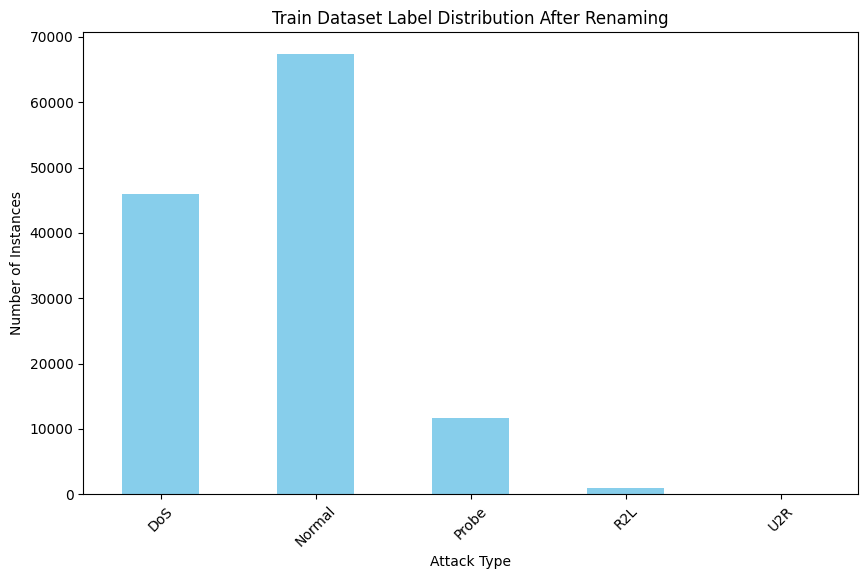

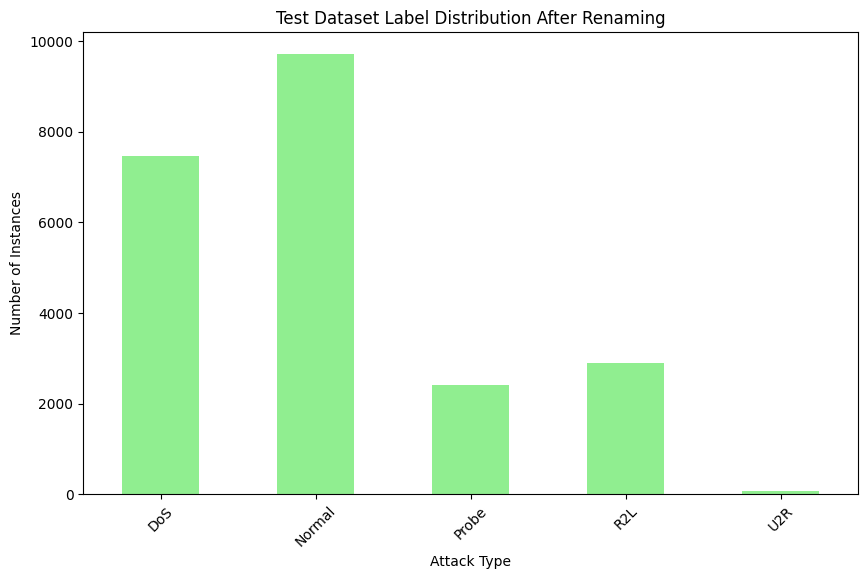

In [72]:
import matplotlib.pyplot as plt

# Create copies of the datasets
newset_copy = newset.copy()
newset_test_copy = newset_test.copy()

# Rename labels
label_mapping = {
    0: 'Normal',
    1: 'DoS',
    2: 'Probe',
    3: 'R2L',
    4: 'U2R'
}

# replace labels in the training set copy
newset_copy['label'] = newset_copy['label'].map(label_mapping)

# for the test set
newset_test_copy['label'] = newset_test_copy['label'].map(label_mapping)

# count occurrences of each label in the training set
train_label_counts = newset_copy['label'].value_counts().sort_index()

# same
test_label_counts = newset_test_copy['label'].value_counts().sort_index()

# plotting train dataset label distribution
plt.figure(figsize=(10, 6))
train_label_counts.plot(kind='bar', color='skyblue')
plt.title('Train Dataset Label Distribution After Renaming')
plt.xlabel('Attack Type')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

#same
plt.figure(figsize=(10, 6))
test_label_counts.plot(kind='bar', color='lightgreen')
plt.title('Test Dataset Label Distribution After Renaming')
plt.xlabel('Attack Type')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()


In [73]:
# filter out for each type of attack
drop_DoS = [2, 3, 4]
drop_Probe = [1, 3, 4]
drop_R2L = [1, 2, 4]
drop_U2R = [1, 2, 3]

# filter the 'newset' DataFrame for each type of attack using the isin() function
# For each type of attack, create a new DataFrame containing rows that do not have the values specified in the drop list
DoS_df = newset[~newset['label'].isin(drop_DoS)]
Probe_df = newset[~newset['label'].isin(drop_Probe)]
R2L_df = newset[~newset['label'].isin(drop_R2L)]
U2R_df = newset[~newset['label'].isin(drop_U2R)]

# Filter the 'newset_test' DataFrame
# Similar to the training dataset
DoS_df_test = newset_test[~newset_test['label'].isin(drop_DoS)]
Probe_df_test = newset_test[~newset_test['label'].isin(drop_Probe)]
R2L_df_test = newset_test[~newset_test['label'].isin(drop_R2L)]
U2R_df_test = newset_test[~newset_test['label'].isin(drop_U2R)]

# Print the dimensions (number of rows and columns) of each filtered DataFrame
print('Train:')
print('Dimensions of DoS:', DoS_df.shape)
print('Dimensions of Probe:', Probe_df.shape)
print('Dimensions of R2L:', R2L_df.shape)
print('Dimensions of U2R:', U2R_df.shape)
print('Test:')
print('Dimensions of DoS:', DoS_df_test.shape)
print('Dimensions of Probe:', Probe_df_test.shape)
print('Dimensions of R2L:', R2L_df_test.shape)
print('Dimensions of U2R:', U2R_df_test.shape)


Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


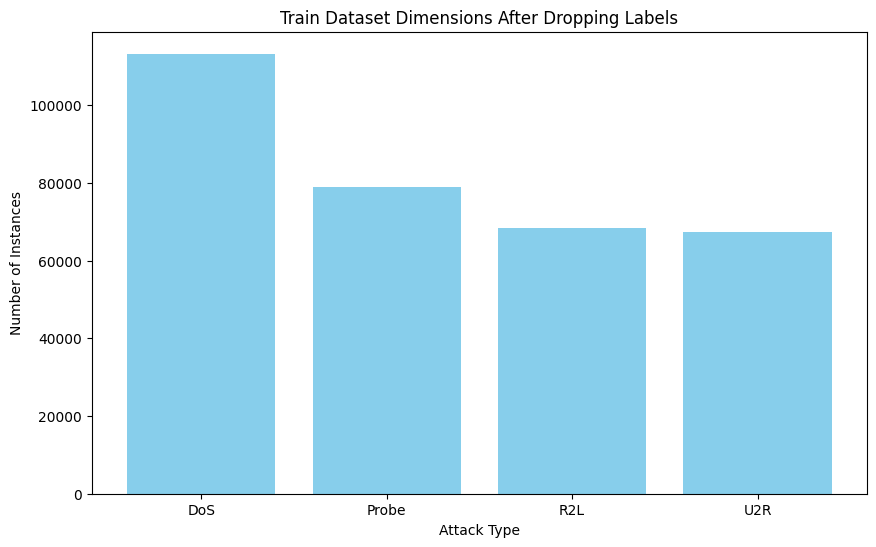

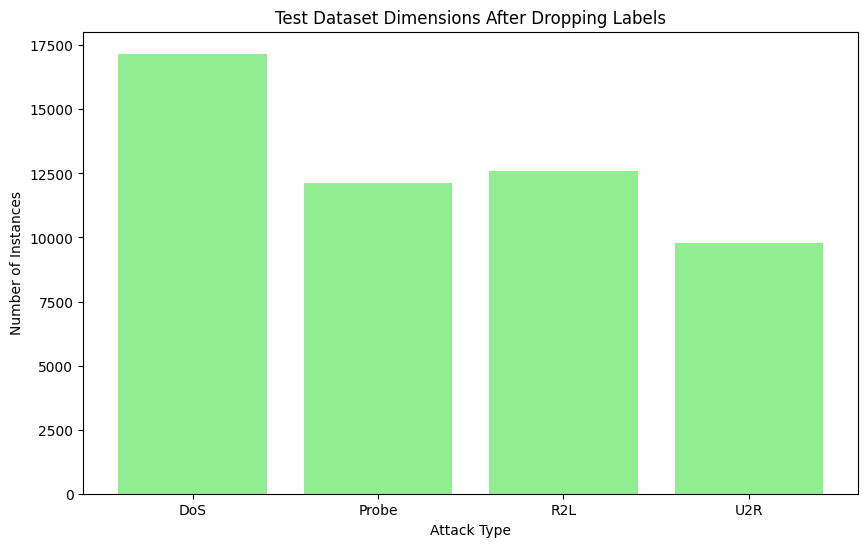

In [74]:

# Calculate dimensions for train datasets
train_dimensions = {
    'DoS': DoS_df.shape[0],
    'Probe': Probe_df.shape[0],
    'R2L': R2L_df.shape[0],
    'U2R': U2R_df.shape[0]
}

# Calculate dimensions for test datasets
test_dimensions = {
    'DoS': DoS_df_test.shape[0],
    'Probe': Probe_df_test.shape[0],
    'R2L': R2L_df_test.shape[0],
    'U2R': U2R_df_test.shape[0]
}

# Plotting train dataset dimensions
plt.figure(figsize=(10, 6))
plt.bar(train_dimensions.keys(), train_dimensions.values(), color='skyblue')
plt.title('Train Dataset Dimensions After Dropping Labels')
plt.xlabel('Attack Type')
plt.ylabel('Number of Instances')
plt.show()

# Plotting test dataset dimensions
plt.figure(figsize=(10, 6))
plt.bar(test_dimensions.keys(), test_dimensions.values(), color='lightgreen')
plt.title('Test Dataset Dimensions After Dropping Labels')
plt.xlabel('Attack Type')
plt.ylabel('Number of Instances')
plt.show()


# Feature Scaling:

In [75]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
#axis=1 --> drop the column
X_DoS = DoS_df.drop('label',axis=1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',axis=1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',axis=1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',axis=1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label',axis=1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',axis=1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',axis=1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',axis=1)
Y_U2R_test = U2R_df_test.label


Save a list of feature names for later use (it is the same for every attack category). Column names are dropped at this stage.

In [76]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

Use StandardScaler() to scale the dataframes

In [77]:
# We're going to standardize our features, which means making them have the same scale so our model can understand them better.

# For the DoS attack type in the training data:
# First, we figure out how to standardize the features by fitting them to a standard scale.
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
# Then, we transform the features using the fitted scaler to make them standardized.
X_DoS = scaler1.transform(X_DoS)

# For the Probe attack type in the training data:
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe = scaler2.transform(X_Probe)

# For the R2L attack type in the training data:
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L = scaler3.transform(X_R2L)

# For the U2R attack type in the training data:
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R = scaler4.transform(X_U2R)

# Now, for the test data:

scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test = scaler5.transform(X_DoS_test)

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test = scaler6.transform(X_Probe_test)

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test = scaler7.transform(X_R2L_test)

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test = scaler8.transform(X_U2R_test)

# Step 3: Feature Selection:

 Univariate Feature Selection using ANOVA F-test: The ANOVA (Analysis of Variance) F-test is a statistical method commonly used in feature selection

In [78]:
# We're going to use a statistical method called ANOVA F-test for univariate feature selection.

# SelectPercentile is a method that retains only a user-specified highest scoring percentage of features.
# Here, we willl use f_classif, which calculates the ANOVA F-value between the labels and features for classification tasks.
#ANOVA F-test measures the correlation between each feature and the target variable
# in our case, it's likely whether an attack is a DoS attack or not. Features with higher F-values are considered more important.
from sklearn.feature_selection import SelectPercentile, f_classif

# Ignore division by zero errors and invalid values during feature selection.
np.seterr(divide='ignore', invalid='ignore')

# Create a feature selector object using SelectPercentile.
# We'll retain the top precent of features based on ANOVA F-values.
selector = SelectPercentile(f_classif, percentile=20)

# Transform the features of the DoS attack type based on the selected percentile.
# This will select the most informative features.
X_newDoS = selector.fit_transform(X_DoS, Y_DoS)

# Get the shape of the transformed feature matrix to see how many features were selected.
X_newDoS.shape


(113270, 25)

Get the features that were selected: DoS

In [79]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_tcp',
 'Protocol_type_udp',
 'service_domain_u',
 'service_ecr_i',
 'service_http',
 'service_private',
 'service_smtp',
 'flag_S0',
 'flag_SF']

In [80]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

(78999, 25)

Get the features that were selected: Probe

In [81]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['duration',
 'logged_in',
 'count',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'Protocol_type_tcp',
 'service_domain_u',
 'service_eco_i',
 'service_http',
 'service_other',
 'service_private',
 'flag_REJ',
 'flag_RSTR',
 'flag_SF']

In [82]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

(68338, 25)

Get the features that were selected: R2L

In [83]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'logged_in',
 'is_guest_login',
 'count',
 'srv_count',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'Protocol_type_tcp',
 'Protocol_type_udp',
 'service_domain_u',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'service_login',
 'service_telnet',
 'flag_RSTO',
 'flag_SH']

In [84]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

(67395, 25)

Get the features that were selected: U2R

In [85]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'Protocol_type_tcp',
 'Protocol_type_udp',
 'service_domain_u',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_smtp',
 'service_telnet',
 'flag_RSTO']

Summary of features selected by Univariate Feature Selection

In [86]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_domain_u', 'service_ecr_i', 'service_http', 'service_private', 'service_smtp', 'flag_S0', 'flag_SF']

Features selected for Probe: ['duration', 'logged_in', 'count', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'Protocol_type_tcp', 'service_domain_u', 'service_eco_i', 'service_http', 'service_other', 'service_private', 'flag_REJ', 'fl

# Step 1: Preprocessing and Feature Selection


In [87]:
import pandas as pd
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

# Perform feature selection using ANOVA F-test for each type of attack
selector_DoS = SelectPercentile(f_classif, percentile=10)
X_newDoS = selector_DoS.fit_transform(X_DoS, Y_DoS)

selector_Probe = SelectPercentile(f_classif, percentile=10)
X_newProbe = selector_Probe.fit_transform(X_Probe, Y_Probe)

selector_R2L = SelectPercentile(f_classif, percentile=10)
X_newR2L = selector_R2L.fit_transform(X_R2L, Y_R2L)

selector_U2R = SelectPercentile(f_classif, percentile=10)
X_newU2R = selector_U2R.fit_transform(X_U2R, Y_U2R)

# Split Data for each type of attack
X_trainDoS, X_testDoS, y_trainDoS, y_testDoS = train_test_split(X_newDoS, Y_DoS, test_size=0.2, random_state=42)
X_trainProbe, X_testProbe, y_trainProbe, y_testProbe = train_test_split(X_newProbe, Y_Probe, test_size=0.2, random_state=42)
X_trainR2L, X_testR2L, y_trainR2L, y_testR2L = train_test_split(X_newR2L, Y_R2L, test_size=0.2, random_state=42)
X_trainU2R, X_testU2R, y_trainU2R, y_testU2R = train_test_split(X_newU2R, Y_U2R, test_size=0.2, random_state=42)


# Step 2: Model Training

In [88]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier for each type of attack
clf_DoS = DecisionTreeClassifier(random_state=42)
clf_Probe = DecisionTreeClassifier(random_state=42)
clf_R2L = DecisionTreeClassifier(random_state=42)
clf_U2R = DecisionTreeClassifier(random_state=42)

# Train the classifiers for each type of attack
clf_DoS.fit(X_trainDoS, y_trainDoS)
clf_Probe.fit(X_trainProbe, y_trainProbe)
clf_R2L.fit(X_trainR2L, y_trainR2L)
clf_U2R.fit(X_trainU2R, y_trainU2R)


DecisionTreeClassifier(random_state=42)

# Step 3: Evaluation

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Predictions for each type of attack
Y_DoS_pred = clf_DoS.predict(X_testDoS)
Y_Probe_pred = clf_Probe.predict(X_testProbe)
Y_R2L_pred = clf_R2L.predict(X_testR2L)
Y_U2R_pred = clf_U2R.predict(X_testU2R)

# Compute confusion matrix for each type of attack
conf_matrix_DoS = confusion_matrix(y_testDoS, Y_DoS_pred)
conf_matrix_Probe = confusion_matrix(y_testProbe, Y_Probe_pred)
conf_matrix_R2L = confusion_matrix(y_testR2L, Y_R2L_pred)
conf_matrix_U2R = confusion_matrix(y_testU2R, Y_U2R_pred)

# Classification report for each type of attack
print("Classification Report for DoS:")
print(classification_report(y_testDoS, Y_DoS_pred))
print("Confusion Matrix for DoS Attack:")
conf_matrix_DoS

print("Classification Report for Probe:")
print(classification_report(y_testProbe, Y_Probe_pred))
print("Confusion Matrix for Probe Attack:")
conf_matrix_Probe

print("Classification Report for R2L:")
print(classification_report(y_testR2L, Y_R2L_pred))
print("Confusion Matrix for R2L Attack:")
conf_matrix_R2L

print("Classification Report for U2R:")
print(classification_report(y_testU2R, Y_U2R_pred))
print(f"Confusion Matrix for U2R Attack:")
conf_matrix_U2R

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13302
           1       0.99      0.97      0.98      9352

    accuracy                           0.98     22654
   macro avg       0.99      0.98      0.98     22654
weighted avg       0.98      0.98      0.98     22654

Confusion Matrix for DoS Attack:
Classification Report for Probe:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13452
           2       0.99      0.99      0.99      2348

    accuracy                           1.00     15800
   macro avg       0.99      0.99      0.99     15800
weighted avg       1.00      1.00      1.00     15800

Confusion Matrix for Probe Attack:
Classification Report for R2L:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13462
           3       0.97      0.96      0.96       206

    accuracy       

array([[13461,     4],
       [    7,     7]])

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate the DoS model
accuracy_DoS, precision_DoS, recall_DoS, f1_DoS = evaluate_model(y_testDoS, Y_DoS_pred)

# Similarly, evaluate models for Probe, R2L, and U2R attacks
accuracy_Probe, precision_Probe, recall_Probe, f1_Probe = evaluate_model(y_testProbe, Y_Probe_pred)
accuracy_R2L, precision_R2L, recall_R2L, f1_R2L = evaluate_model(y_testR2L, Y_R2L_pred)
accuracy_U2R, precision_U2R, recall_U2R, f1_U2R = evaluate_model(y_testU2R, Y_U2R_pred)

# Print evaluation metrics for each type of attack
print("Evaluation Metrics for DoS:")
print("Accuracy:", accuracy_DoS)
print("Precision:", precision_DoS)
print("Recall:", recall_DoS)
print("F1 Score:", f1_DoS)


Evaluation Metrics for DoS:
Accuracy: 0.9843294782378388
Precision: 0.9843828214800141
Recall: 0.9843294782378388
F1 Score: 0.9843096596976998


# Step 4: Testing

In [91]:
# Transform test data using the same selectors for each type of attack
X_test_newDoS = selector_DoS.transform(X_DoS_test)
X_test_newProbe = selector_Probe.transform(X_Probe_test)
X_test_newR2L = selector_R2L.transform(X_R2L_test)
X_test_newU2R = selector_U2R.transform(X_U2R_test)

# Predictions on test data for each type of attack
Y_DoS_test_pred = clf_DoS.predict(X_test_newDoS)
Y_Probe_test_pred = clf_Probe.predict(X_test_newProbe)
Y_R2L_test_pred = clf_R2L.predict(X_test_newR2L)
Y_U2R_test_pred = clf_U2R.predict(X_test_newU2R)

# Classification report on test data for each type of attack
print("Classification Report for DoS (Test Data):")
print(classification_report(Y_DoS_test, Y_DoS_test_pred))

print("Classification Report for Probe (Test Data):")
print(classification_report(Y_Probe_test, Y_Probe_test_pred))

print("Classification Report for R2L (Test Data):")
print(classification_report(Y_R2L_test, Y_R2L_test_pred))

print("Classification Report for U2R (Test Data):")
print(classification_report(Y_U2R_test, Y_U2R_test_pred))

#for y_true, y_pred, attack in zip(y_trues, y_preds, ['DoS', 'Probe', 'R2L', 'U2R']):
    # print(f"Classification Report for {attack} Attack:")
    # print(classification_report(y_true, y_pred))
    # print(f"Confusion Matrix for {attack} Attack:")
    # print(confusion_matrix(y_true, y_pred))
    # print(f"Accuracy for {attack} Attack: {accuracy_score(y_true, y_pred)}")
    # print(f"Precision for {attack} Attack: {precision_score(y_true, y_pred, average='weighted')}")
    # print(f"Recall for {attack} Attack: {recall_score(y_true, y_pred, average='weighted')}")
    # print(f"F1-Score for {attack} Attack: {f1_score(y_true, y_pred, average='weighted')}")
    # print()

Classification Report for DoS (Test Data):
              precision    recall  f1-score   support

           0       0.31      0.23      0.27      9711
           1       0.25      0.33      0.28      7460

    accuracy                           0.27     17171
   macro avg       0.28      0.28      0.27     17171
weighted avg       0.28      0.27      0.27     17171

Classification Report for Probe (Test Data):
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      9711
           2       0.62      0.19      0.29      2421

    accuracy                           0.82     12132
   macro avg       0.72      0.58      0.59     12132
weighted avg       0.79      0.82      0.77     12132

Classification Report for R2L (Test Data):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       0.00      0.00      0.00      2885

    accuracy                           0.77     125

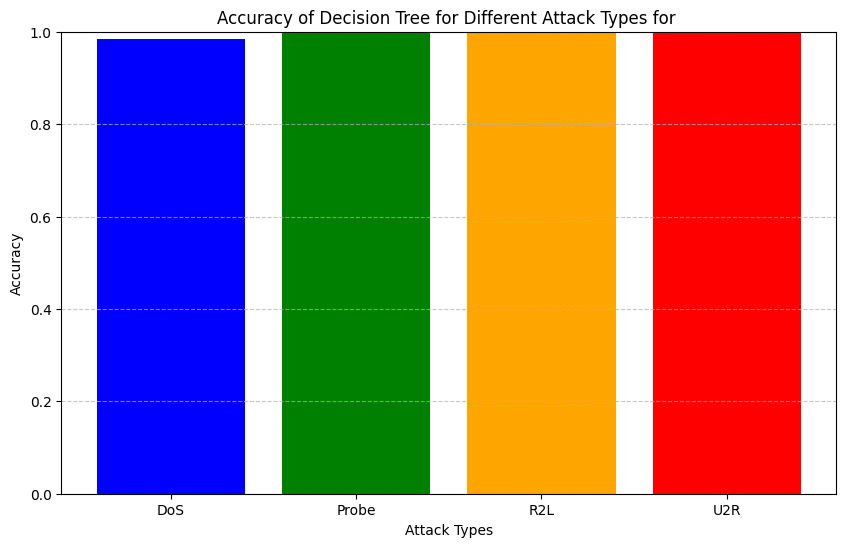

In [92]:
import matplotlib.pyplot as plt

# Accuracy values for each type of attack
accuracies = [accuracy_DoS, accuracy_Probe, accuracy_R2L, accuracy_U2R]
attack_types = ['DoS', 'Probe', 'R2L', 'U2R']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(attack_types, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy of Decision Tree for Different Attack Types for ')
plt.xlabel('Attack Types')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

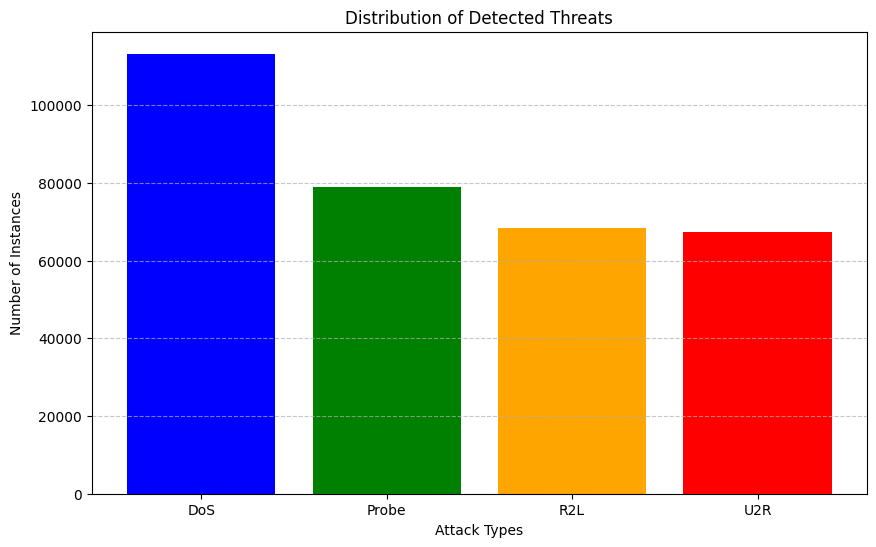

Implications for Cybersecurity:
DoS attacks are the most common, aimed at rendering a computer or network unavailable to users.
Probe attacks involve scanning and probing for vulnerabilities in a system, potentially leading to unauthorized access.
R2L attacks occur when an attacker gains unauthorized access to a system from a remote location.
U2R attacks involve escalating privileges to gain root access, indicating a serious security breach.


In [93]:
import matplotlib.pyplot as plt


# Dictionary to store the counts of each attack type
attack_counts = {
    "DoS": len(DoS_df),
    "Probe": len(Probe_df),
    "R2L": len(R2L_df),
    "U2R": len(U2R_df)
}

# Plotting the counts of each attack type
plt.figure(figsize=(10, 6))
plt.bar(attack_counts.keys(), attack_counts.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Distribution of Detected Threats')
plt.xlabel('Attack Types')
plt.ylabel('Number of Instances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Implications for Cybersecurity:")
print("DoS attacks are the most common, aimed at rendering a computer or network unavailable to users.")
print("Probe attacks involve scanning and probing for vulnerabilities in a system, potentially leading to unauthorized access.")
print("R2L attacks occur when an attacker gains unauthorized access to a system from a remote location.")
print("U2R attacks involve escalating privileges to gain root access, indicating a serious security breach.")

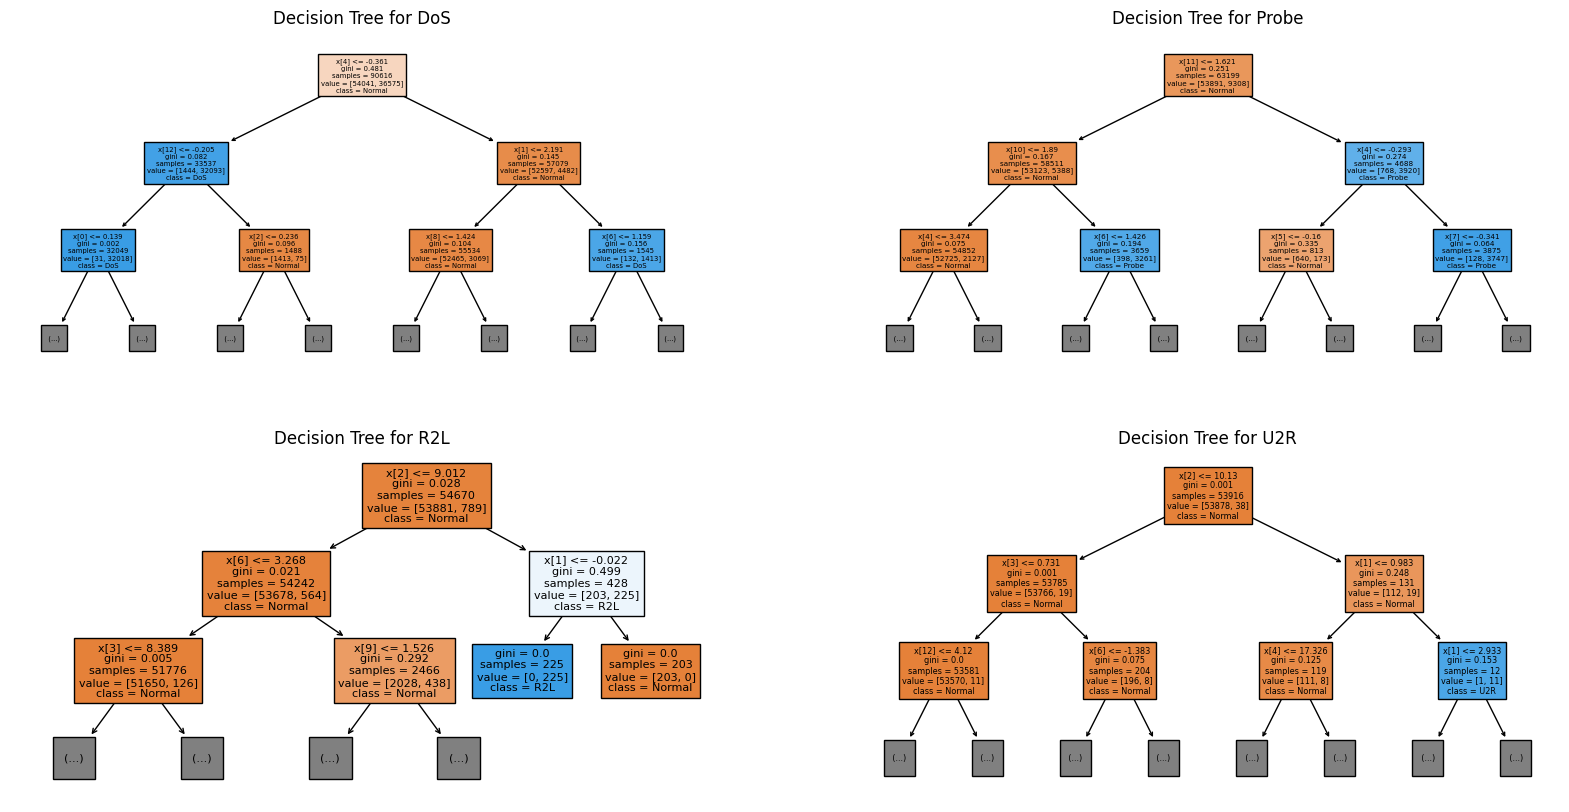

In [94]:
from sklearn.tree import plot_tree
# Visualize Decision Trees for each type of attack
plt.figure(figsize=(20, 10))

# Decision Tree for DoS
plt.subplot(221)
plot_tree(clf_DoS, filled=True, class_names=['Normal', 'DoS'], max_depth=2)
plt.title('Decision Tree for DoS')

# Decision Tree for Probe
plt.subplot(222)
plot_tree(clf_Probe, filled=True, class_names=['Normal', 'Probe'], max_depth=2)
plt.title('Decision Tree for Probe')

# Decision Tree for R2L
plt.subplot(223)
plot_tree(clf_R2L, filled=True, class_names=['Normal', 'R2L'], max_depth=2)
plt.title('Decision Tree for R2L')

# Decision Tree for U2R
plt.subplot(224)
plot_tree(clf_U2R, filled=True, class_names=['Normal', 'U2R'], max_depth=2)
plt.title('Decision Tree for U2R')

plt.show()
